In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Conductivity function
def conductivity(x):
    return 1 + 0 * x

In [3]:
# External force function
def external_force(x):
    return 0 * x

In [4]:
# Mass matrix
def mass_matrix(x):
    n = len(x) - 1
    M = np.zeros((n + 1, n + 1))
    for i in range(n):
        h = x[i + 1] - x[i]
        M[i, i] += h / 3
        M[i + 1, i + 1] += h / 3
        M[i, i + 1] += h / 6
        M[i + 1, i] += h / 6
    return M

In [5]:
# Stiffness matrix
def stiffness_matrix(x, a_func, kappa):
    n = len(x) - 1
    A = np.zeros((n + 1, n + 1))
    for i in range(n):
        h = x[i + 1] - x[i]
        xmid = (x[i + 1] + x[i]) / 2
        a_mid = a_func(xmid)
        A[i, i] += a_mid / h
        A[i + 1, i + 1] += a_mid / h
        A[i, i + 1] -= a_mid / h
        A[i + 1, i] -= a_mid / h
    A[0, 0] += kappa[0]
    A[-1, -1] += kappa[1]
    return A

In [6]:
# Load vector
def load_vector(x, f_func, g, kappa):
    n = len(x) - 1
    b = np.zeros(n + 1)
    for i in range(n):
        h = x[i + 1] - x[i]
        b[i] += f_func(x[i]) * h / 2
        b[i + 1] += f_func(x[i + 1]) * h / 2
    b[0] += kappa[0] * g[0]
    b[-1] += kappa[1] * g[1]
    return b

In [7]:
# Wave solver
def wave_solver():
    L = 10
    h = 0.02
    x = np.arange(0, L + h, h)
    m = 50
    T = 2 * np.pi
    t = np.linspace(0, T, m + 1)

    xi = np.sin((4 * np.pi / 10) * x)
    eta = np.zeros_like(x)

    kappa = [1e7, 1e7]
    g = [0, 0]
    c = 1

    M = mass_matrix(x)
    A = stiffness_matrix(x, conductivity, kappa)
    b = load_vector(x, external_force, g, kappa)

    for l in range(m):
        k = t[l + 1] - t[l]
        n = len(x)
        P = np.block([
            [M, -k / 2 * M],
            [c**2 / 2 * k * A, M]
        ])
        Q = np.block([
            [M, k / 2 * M],
            [-c**2 / 2 * k * A, M]
        ])
        B = np.concatenate([np.zeros(n), k * b])
        RHS = Q @ np.concatenate([xi, eta]) + B
        U = np.linalg.solve(P, RHS)
        xi = U[:n]
        eta = U[n:]

    plt.figure(figsize=(10, 5))
    plt.plot(x, xi, label='Displacement at final time')
    plt.xlabel("x")
    plt.ylabel("u(x, t=T)")
    plt.title("Wave Equation Solution at Final Time (FEM + BWD)")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

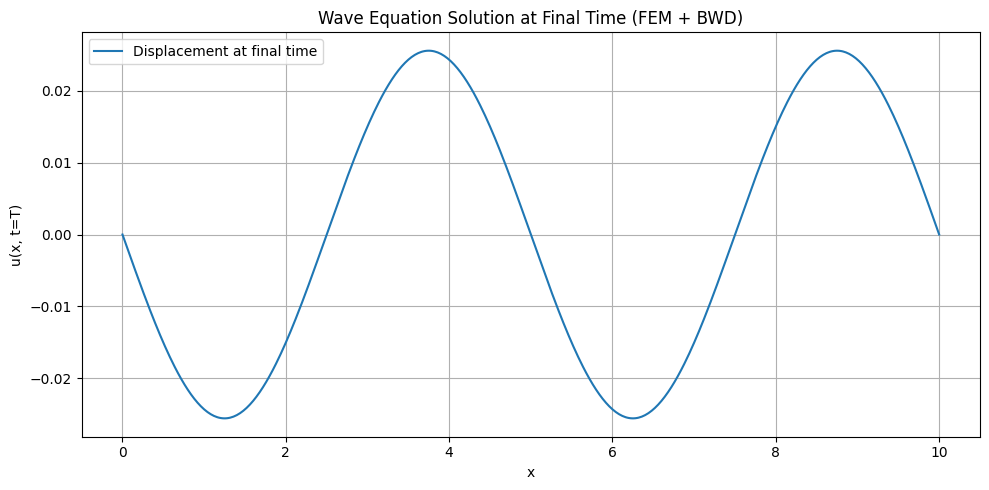

In [8]:
if __name__ == "__main__":
    wave_solver()